In [1]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("decryption_time1.csv")
df

,Num Encryption bits,Decryption time (ms)
0,15,0.000000
1,16,0.000000
2,17,5.004168
3,18,11.009216
4,19,20.018578
5,20,124.625921
6,21,210.190773
7,22,187.170267
8,23,655.646324
9,24,669.641733


In [3]:
y = df["Decryption time (ms)"].values
x = df["Num Encryption bits"].values

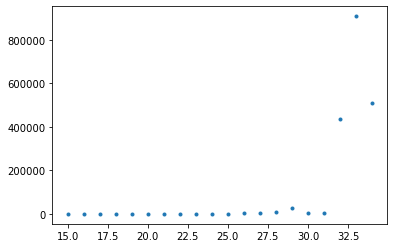

In [4]:
plt.plot(x, y, '.');

In [5]:
params = optimize.curve_fit(lambda t,a,b:  a*np.exp(b*t),  x,  y)
p0 = params[0][0]
p1 = params[0][1]

In [6]:
fittedy = np.array([p0*np.exp(z*p1) for z in x])

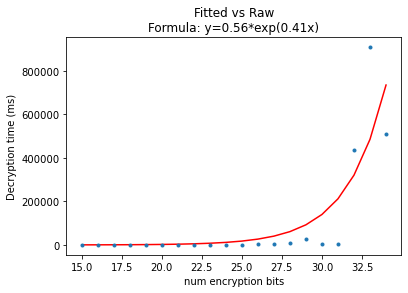

In [7]:
plt.plot(x, fittedy, '-', color='red')
plt.plot(x, y, '.')
plt.title(f"Fitted vs Raw\nFormula: y={p0:.2f}*exp({p1:.2f}x)")
plt.xlabel("num encryption bits")
plt.ylabel("Decryption time (ms)")
plt.savefig("exponential_plot.png");


In [8]:
#1024 bit decryption time
long_time = p0*np.exp(p1*1024)
print(f"It would take approximately {long_time} ms to crack a 1024 encryption key.\nThis is approximately {long_time*0.001*0.0166667*0.000694444} days.\nWhich is also {long_time*0.001*0.0166667*0.000694444*0.00273973} years.\nWhich is {long_time*0.001*0.0166667*0.000694444*0.00273973*0.01} centuries.")

It would take approximately 1.3260038750045196e+184 ms to crack a 1024 encryption key.
This is approximately 1.5347287944075142e+176 days.
Which is also 4.2047425199020993e+173 years.
Which is 4.2047425199021e+171 centuries.
